<a href="https://colab.research.google.com/github/shailza969/Fashion-MNIST-image-classification/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shailzabansal","key":"73bb5550ea87469ce9208aed0b12b286"}'}

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
 ! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              229KB  2021-06-18 20:55:49           7836  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4773  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1598  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   1GB  2021-06-09 15:58:24           2259  
mathurinache/twitter-edge-nodes                               Tw

In [5]:
! kaggle datasets download -d zalando-research/fashionmnist

 76% 52.0M/68.8M [00:00<00:00, 75.9MB/s]
100% 68.8M/68.8M [00:00<00:00, 140MB/s] 


In [6]:
! unzip /content/fashionmnist.zip

Archive:  /content/fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
train_df = pd.read_csv("/content/fashion-mnist_train.csv")

In [9]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [10]:
train_df.shape

(60000, 785)

In [84]:
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

In [85]:
X_train.shape, y_train.shape


((60000, 784), (60000,))

In [86]:
X_train= X_train/255.

In [87]:
def print_img(img):
  img =img.reshape(28,28)
  print(plt.imshow(img, cmap='gray'))

AxesImage(54,36;334.8x217.44)


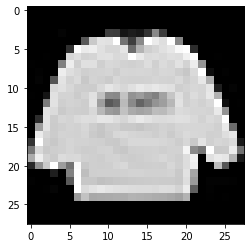

In [88]:
print_img(X_train[0])

# NN

In [89]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
y_train = one.fit_transform(y_train.reshape(-1,1)).toarray()
y_train.shape

(60000, 10)

In [102]:
from keras.models import Sequential

In [103]:
from keras.layers import Dense, Dropout


In [111]:
output_size = 1
# model creator
model = Sequential()

In [112]:
#First layer
model.add(Dense(units = 256, activation = 'relu', input_dim = 784))
model.add(Dropout(rate = 0.25))

In [113]:
# Hidden layer
model.add(Dense(units = 256, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 126, activation='relu'))
model.add(Dropout(rate = 0.25))

In [114]:
# output layer
model.add(Dense(units = 10, activation='softmax'))

In [115]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_25 (Dense)             (None, 126)               32382     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1270      
Total params: 300,404
Trainable params: 300,404
Non-trainable params: 0
_________________________________________________________________


# with 1 hidden layer

In [31]:
model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 17s 2ms/step - loss: 6.2282 - accuracy: 0.6954 - val_loss: 0.6704 - val_accuracy: 0.7918
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6688 - accuracy: 0.7834 - val_loss: 0.6898 - val_accuracy: 0.7882
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6572 - accuracy: 0.7924 - val_loss: 0.6601 - val_accuracy: 0.8039
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6327 - accuracy: 0.7977 - val_loss: 0.6924 - val_accuracy: 0.7690
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5572 - accuracy: 0.8146 - val_loss: 0.5319 - val_accuracy: 0.8163
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4898 - accuracy: 0.8304 - val_loss: 0.5107 - val_accuracy: 0.8235
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4625 - accuracy: 0.8357 - val_loss: 0.4459 - val_accuracy

# With 2 hidden Layers

In [110]:
model.fit(X_train, y_train, epochs = 20, batch_size = 64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.6678 - accuracy: 0.7626 - val_loss: 0.4048 - val_accuracy: 0.8592
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3784 - accuracy: 0.8637 - val_loss: 0.3810 - val_accuracy: 0.8618
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3390 - accuracy: 0.8764 - val_loss: 0.3456 - val_accuracy: 0.8773
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3123 - accuracy: 0.8837 - val_loss: 0.3460 - val_accuracy: 0.8762
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2904 - accuracy: 0.8931 - val_loss: 0.3288 - val_accuracy: 0.8817
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2796 - accuracy: 0.8953 - val_loss: 0.3387 - val_accuracy: 0.8833
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2589 - accuracy: 0.9023 - val_loss: 0.3284 - val_accuracy: 0.8832
Epoch 

# With dropout layers


In [116]:
model.fit(X_train, y_train, epochs = 20, batch_size = 64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.8268 - accuracy: 0.7003 - val_loss: 0.4466 - val_accuracy: 0.8314
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4542 - accuracy: 0.8338 - val_loss: 0.4116 - val_accuracy: 0.8520
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4118 - accuracy: 0.8490 - val_loss: 0.3834 - val_accuracy: 0.8634
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3894 - accuracy: 0.8581 - val_loss: 0.3622 - val_accuracy: 0.8722
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3677 - accuracy: 0.8645 - val_loss: 0.3498 - val_accuracy: 0.8713
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3493 - accuracy: 0.8714 - val_loss: 0.3455 - val_accuracy: 0.8742
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3378 - accuracy: 0.8771 - val_loss: 0.3426 - val_accuracy: 0.8810
Epoch 

In [66]:
X_train.shape

(60000, 784)

In [117]:
model.history.history

{'accuracy': [0.7791249752044678,
  0.8370208144187927,
  0.8529166579246521,
  0.8606666922569275,
  0.8653541803359985,
  0.871708333492279,
  0.8757083415985107,
  0.8781874775886536,
  0.8797500133514404,
  0.8822500109672546,
  0.885729193687439,
  0.887583315372467,
  0.8881875276565552,
  0.8898749947547913,
  0.8933958411216736,
  0.8944166898727417,
  0.895520806312561,
  0.8973125219345093,
  0.8982083201408386,
  0.9001666903495789],
 'loss': [0.6130363941192627,
  0.4479339122772217,
  0.40607234835624695,
  0.3826133608818054,
  0.366079181432724,
  0.3523654639720917,
  0.3399112820625305,
  0.333879679441452,
  0.3247126042842865,
  0.3181738257408142,
  0.3125293254852295,
  0.30303138494491577,
  0.30078423023223877,
  0.2978804409503937,
  0.2898338735103607,
  0.2853422164916992,
  0.2824144661426544,
  0.27738845348358154,
  0.27374765276908875,
  0.2663499116897583],
 'val_accuracy': [0.831416666507721,
  0.8519999980926514,
  0.8634166717529297,
  0.87216669321060

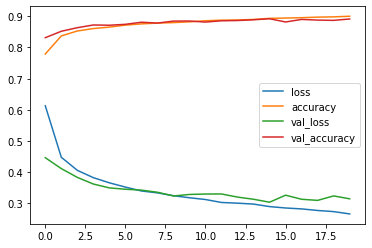

In [118]:
pd.DataFrame(model.history.history).plot()
plt.show()

In [119]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2403 - accuracy: 0.9111


[0.24034202098846436, 0.911050021648407]

In [123]:
pred = model.predict(X_train)
pred = pred>= 0.5

In [124]:
pred[:10]

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [False, False, False, False, False,  True, False, False, False,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False,  True,
        False]])